# Summarize results from parameterized training experiments

In [1]:
from opensoundscape import Audio, Spectrogram, CNN, BoxedAnnotations

import numpy as np
import pandas as pd
from glob import glob
from pathlib import Path

from matplotlib import pyplot as plt
def figsize(w,h):
    plt.rcParams['figure.figsize']=[w,h]
figsize(15,5) #for big visuals
%config InlineBackend.figure_format = 'retina'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
from ast import literal_eval
# use gill sans
plt.rcParams['font.family'] = 'Gill Sans'

import sys
sys.path.append('../../src')
from evaluation import mean_range_table

In [ ]:
results = pd.read_csv("../../results/training_experiment_results.csv")
results["Tags"] = results["Tags"].str.split(",")
results["Tags"] = results["Tags"].apply(
    lambda x: [tag.strip() for tag in x] if x == x else []
)

# loss functions

In [3]:
metrics = [
    "accuracy",
    "ari (Max)",
    "nmi",
    "fmi",
    "v_measure",
]  #'purity', #'homogeneity', 'completeness',

In [4]:
r = results[results["Tags"].apply(lambda x: x == x and "loss" in x)]
summary = r.groupby("Name")[metrics].mean().sort_values("accuracy", ascending=False)

# sort r so that Name is in the same order as summary
r["Name"] = pd.Categorical(r["Name"], categories=summary.index, ordered=True)
r = r.sort_values("Name")

/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_24765/365796244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r["Name"] = pd.Categorical(r["Name"], categories=summary.index, ordered=True)


In [ ]:
summary_df = mean_range_table(r, "Name", metrics)
summary_df = summary_df.rename(
    columns={
        "accuracy": "Accuracy",
        "ari (Max)": "ARI",
        "nmi": "NMI",
        "fmi": "FMI",
        "v_measure": "V-Measure",
    }
)
summary_df.to_csv("../../results/experiments_loss_summary.csv")

/Users/SML161/song25_oven_aiid/oven_aiid/develop_and_evaluate_aiid/5_evaluate_individual_id/../../src/evaluation.py:417: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby(grouping_col):


/Users/SML161/miniconda3/envs/opso0110/lib/python3.11/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


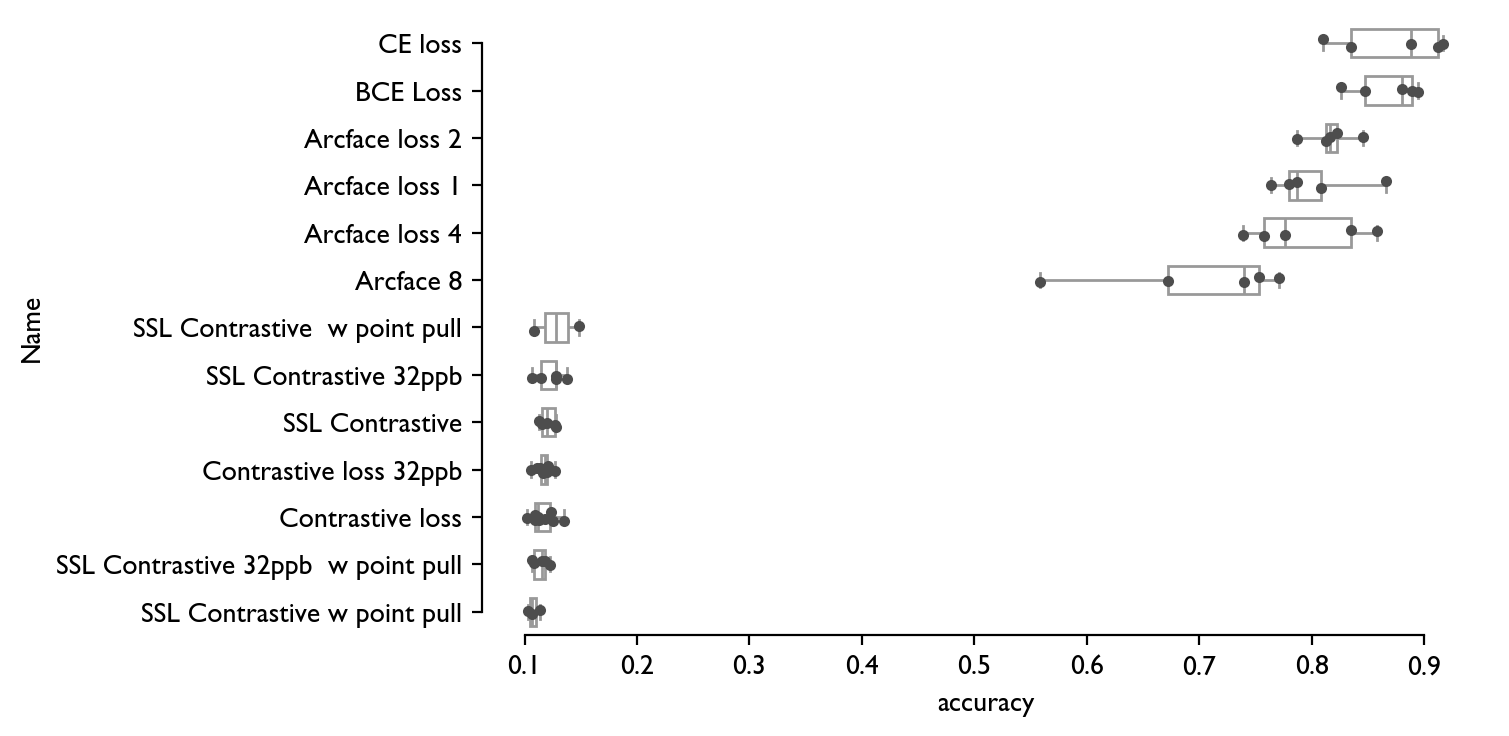

In [ ]:
import seaborn as sns

figsize(6.5, 4)
sns.set_palette(sns.color_palette("crest") + sns.color_palette("flare", 8))

# Plotting the boxplot for the top 10 models based on accuracy

sns.boxplot(r, x="accuracy", y="Name", whis=[0, 100], width=0.6, color="#ffffff")

# Add in points to show each observation
sns.stripplot(r, x="accuracy", y="Name", size=4, color=".3")

# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True)
plt.savefig("../../figures/FigureS4_experiments_loss.pdf")

In [11]:
import tuftelike

/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_24765/544652970.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r.groupby(["strategy", "Name"])[metrics]


Text(0, 0.5, 'Validation set mean performance')

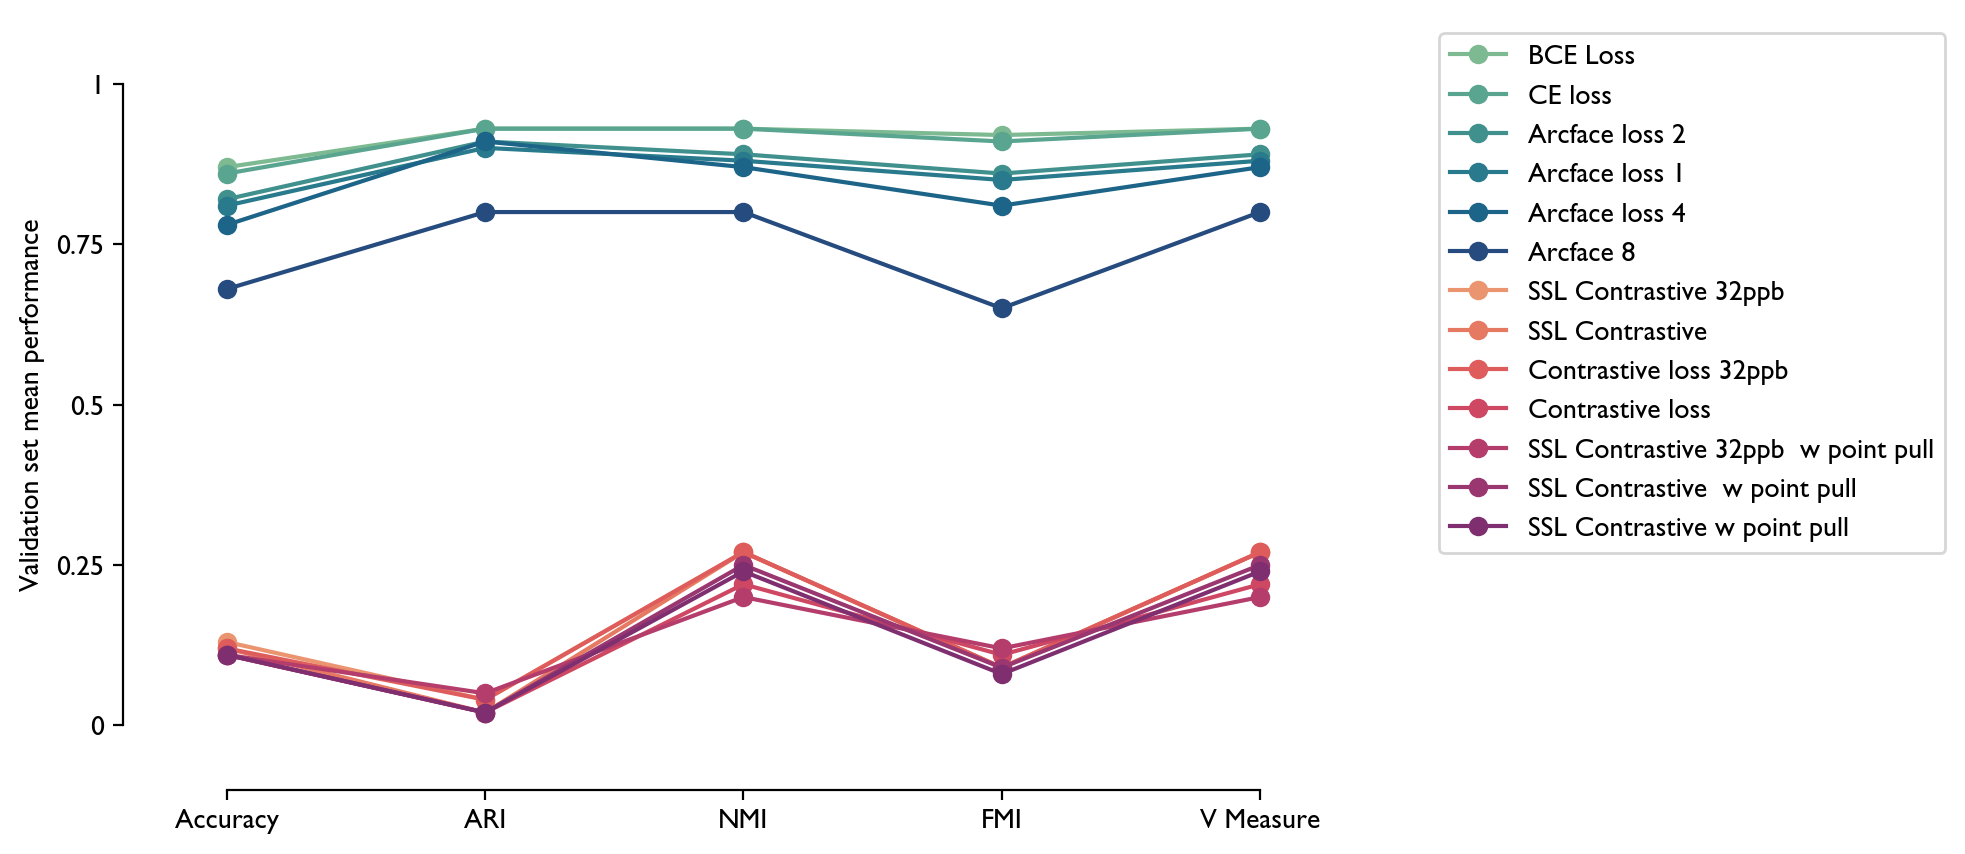

In [ ]:
figsize(8, 5)
summary = (
    r.groupby(["strategy", "Name"])[metrics]
    .mean()
    .sort_values("accuracy", ascending=False)
)
summary = summary.dropna().round(2)
summary = summary.rename(
    columns={
        "ari (Max)": "ARI",
        "nmi": "NMI",
        "accuracy": "Accuracy",
        "fmi": "FMI",
        "v_measure": "V Measure",
    }
)
fig, ax = plt.subplots()
ax.plot(summary.T, marker="o")

tuftelike.adjust(summary.columns, [0, 1], ax=ax)

# put legend outside
plt.legend(
    summary.index.get_level_values(1), bbox_to_anchor=(1.05, 1), loc="upper left"
)

plt.ylabel("Validation set mean performance")
plt.savefig("../../results/loss_functions_across_metrics.pdf")

# training data size

/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_24765/641886254.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r["data.n_train_samples"] = r["data.n_train_samples"].fillna(94378).astype(int)
/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_24765/641886254.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r["Name"] = pd.Categorical(
/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_24765/641886254.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

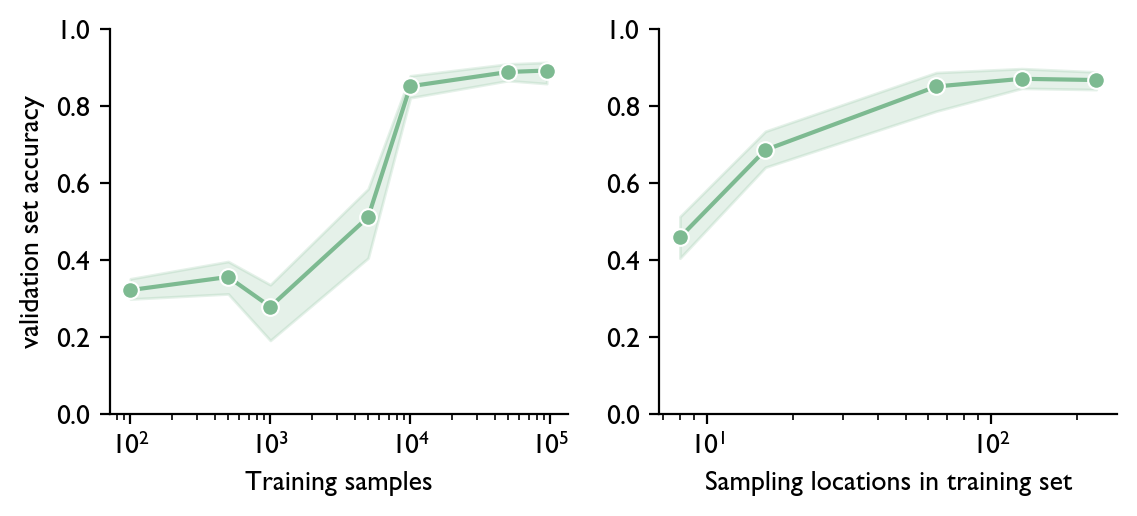

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(6.5, 2.5))

# n training samples

r = results[results["Tags"].apply(lambda x: x == x and "nsamples" in x)]
r["data.n_train_samples"] = r["data.n_train_samples"].fillna(94378).astype(int)

summary_df_nsamples = mean_range_table(r, "data.n_train_samples", metrics)
summary_df_nsamples = summary_df_nsamples.rename(
    columns={
        "accuracy": "Accuracy",
        "ari (Max)": "ARI",
        "nmi": "NMI",
        "fmi": "FMI",
        "v_measure": "V-Measure",
    }
).sort_index(ascending=True)
summary_df_nsamples.to_csv("../../results/experiment_nsamples_summary.csv")


# sort r so that Name is in the same order as summary
r["Name"] = pd.Categorical(
    r["Name"], categories=summary_df_nsamples.index, ordered=True
)
r = r.sort_values("Name")


# Tweak the visual presentation
ax = axs[0]

sns.lineplot(
    r, x="data.n_train_samples", y="accuracy", ax=ax, errorbar="ci", marker="o"
)
# ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_ylim([0, 1])
# sns.despine(trim=True)
ax.set_xlabel("Training samples")
# plt.savefig('../../results/experiment_n_training_samples.pdf')
# rotate axis labels for x axis on axs[0]
ax.semilogx()


# n points in training data

r = results[results["Tags"].apply(lambda x: x == x and "npoints" in x)]
r["data.max_points"] = (
    r["data.max_points"].fillna(234).astype(int).replace("BCE Loss", 234)
)


summary_df_npoints = mean_range_table(r, "data.max_points", metrics)
summary_df_npoints = summary_df_npoints.rename(
    columns={
        "accuracy": "Accuracy",
        "ari (Max)": "ARI",
        "nmi": "NMI",
        "fmi": "FMI",
        "v_measure": "V-Measure",
    }
).sort_index(ascending=True)
summary_df_npoints.to_csv("../../results/experiment_npoints_summary.csv")

# sort r so that Name is in the same order as summary
summary = summary.reset_index(drop=False).set_index("Name")
r["Name"] = pd.Categorical(r["Name"], categories=summary.index, ordered=True)
r = r.sort_values("Name")

ax.set(ylabel="validation set accuracy")


# Tweak the visual presentation
ax = axs[1]

sns.lineplot(r, x="data.max_points", y="accuracy", ax=ax, errorbar="ci", marker="o")
# ax.xaxis.grid(True)
ax.set_ylim([0, 1])
ax.set_xlabel("Sampling locations in training set")
# plt.savefig('../results/experiment_n_training_samples.pdf')
# rotate axis labels for x axis on axs[0]
ax.semilogx()
ax.set_ylabel(None)
sns.despine(trim=False)
#
plt.savefig("../../figures/Figure4bc_experiment_training_set_size.pdf")

In [273]:
summary_df_npoints

,Accuracy,ARI,NMI,FMI,V-Measure
data.max_points,,,,,
8,0.46 (0.35-0.51),0.51 (0.43-0.56),0.66 (0.61-0.71),0.43 (0.34-0.54),0.66 (0.61-0.71)
16,0.69 (0.62-0.77),0.76 (0.72-0.78),0.82 (0.79-0.86),0.69 (0.63-0.77),0.82 (0.79-0.86)
64,0.85 (0.73-0.89),0.92 (0.90-0.93),0.91 (0.86-0.93),0.87 (0.71-0.92),0.91 (0.86-0.93)
128,0.87 (0.83-0.91),0.93 (0.92-0.94),0.93 (0.91-0.94),0.91 (0.88-0.93),0.93 (0.91-0.94)
234,0.87 (0.83-0.89),0.93 (0.91-0.94),0.93 (0.91-0.95),0.91 (0.87-0.94),0.93 (0.91-0.95)


In [274]:
summary_df_nsamples.sort_index(ascending=True)

,Accuracy,ARI,NMI,FMI,V-Measure
data.n_train_samples,,,,,
100,0.32 (0.29-0.38),0.22 (0.18-0.25),0.48 (0.44-0.51),0.17 (0.15-0.19),0.48 (0.44-0.51)
500,0.36 (0.28-0.41),0.14 (0.09-0.20),0.52 (0.43-0.56),0.18 (0.15-0.21),0.52 (0.43-0.56)
1000,0.28 (0.11-0.35),0.14 (0.10-0.18),0.42 (0.05-0.54),0.18 (0.16-0.24),0.42 (0.05-0.54)
5000,0.51 (0.31-0.60),0.42 (0.20-0.55),0.68 (0.52-0.77),0.44 (0.18-0.58),0.68 (0.52-0.77)
10000,0.85 (0.76-0.89),0.93 (0.91-0.94),0.92 (0.88-0.95),0.90 (0.82-0.94),0.92 (0.88-0.95)
50000,0.89 (0.84-0.92),0.94 (0.93-0.95),0.94 (0.92-0.96),0.93 (0.90-0.95),0.94 (0.92-0.96)
94378,0.89 (0.83-0.92),0.95 (0.93-0.96),0.94 (0.91-0.95),0.92 (0.87-0.94),0.94 (0.91-0.95)


# backbone architecture

In [ ]:
import seaborn as sns

# n training samples

r = results[results["Tags"].apply(lambda x: x == x and "arch" in x)]

# summarize with mean and range
summary_df = mean_range_table(r, "training.backbone", metrics)
summary_df.index.name = "Backbone"

summary_df = summary_df.rename(
    columns={
        "accuracy": "Accuracy",
        "ari (Max)": "ARI",
        "nmi": "NMI",
        "fmi": "FMI",
        "v_measure": "V-Measure",
    }
).sort_values("Accuracy", ascending=False)
# Display or export
summary_df.to_csv("../../results/experiment_architecture_summary.csv")
summary_df

,Accuracy,ARI,NMI,FMI,V-Measure
Backbone,,,,,
resnet18,0.87 (0.83-0.89),0.93 (0.91-0.94),0.93 (0.91-0.95),0.91 (0.87-0.94),0.93 (0.91-0.95)
resnet50,0.80 (0.73-0.84),0.85 (0.69-0.92),0.90 (0.87-0.91),0.84 (0.72-0.89),0.90 (0.87-0.91)
hawkears,0.58 (0.48-0.66),0.51 (0.44-0.69),0.71 (0.64-0.78),0.47 (0.33-0.64),0.71 (0.64-0.78)


# preprocessing

In [ ]:
import seaborn as sns

# n training samples

r = results[results["Tags"].apply(lambda x: x == x and "clip_length" in x)]

# summarize with mean and range
summary_df = mean_range_table(r, "preprocessing.clip_duration", metrics)
summary_df.index.name = "Clip Duration (s)"

summary_df = summary_df.rename(
    columns={
        "accuracy": "Accuracy",
        "ari (Max)": "ARI",
        "nmi": "NMI",
        "fmi": "FMI",
        "v_measure": "V-Measure",
    }
).sort_index()
# Display or export
summary_df.to_csv("../../results/experiment_clip_duration.csv")
summary_df

,Accuracy,ARI,NMI,FMI,V-Measure
Clip Duration (s),,,,,
1,0.82 (0.71-0.86),0.86 (0.75-0.90),0.90 (0.85-0.92),0.86 (0.72-0.90),0.90 (0.85-0.92)
2,0.85 (0.81-0.91),0.89 (0.85-0.93),0.92 (0.90-0.95),0.89 (0.84-0.93),0.92 (0.90-0.95)
3,0.87 (0.83-0.89),0.93 (0.91-0.94),0.93 (0.91-0.95),0.91 (0.87-0.94),0.93 (0.91-0.95)
4,0.83 (0.76-0.89),0.91 (0.84-0.93),0.91 (0.88-0.94),0.88 (0.82-0.93),0.91 (0.88-0.94)


In [ ]:
import seaborn as sns

# n training samples

r = results[results["Tags"].apply(lambda x: x == x and "preprocess" in x)]

# summarize with mean and range
summary_df = mean_range_table(r, "Name", metrics)
summary_df.index.name = "Preprocessing Strategy"
summary_df.index = summary_df.index.str.replace(
    "BCE Loss", "baseline"
)  # , regex=False)

summary_df = summary_df.rename(
    columns={
        "accuracy": "Accuracy",
        "ari (Max)": "ARI",
        "nmi": "NMI",
        "fmi": "FMI",
        "v_measure": "V-Measure",
    }
).sort_index()
# Display or export
summary_df.to_csv("../../results/experiment_preprocessing.csv")
summary_df

,Accuracy,ARI,NMI,FMI,V-Measure
Preprocessing Strategy,,,,,
baseline,0.87 (0.83-0.89),0.93 (0.91-0.94),0.93 (0.91-0.95),0.91 (0.87-0.94),0.93 (0.91-0.95)
overlay,0.90 (0.88-0.93),0.94 (0.93-0.95),0.95 (0.94-0.96),0.94 (0.93-0.96),0.95 (0.94-0.96)
reduce noise,0.90 (0.86-0.93),0.94 (0.89-0.96),0.95 (0.93-0.97),0.94 (0.90-0.96),0.95 (0.93-0.97)
